<h1 style="font-size:3rem;color:#A3623B;">Lab 5: Support Vector Machines</h1>

## Security and Ethical aspects of data
### Amaya Nogales Gómez


<h2> Part 3: Performance evaluation.</h2>

In [2]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn.svm import SVC
from sklearn import datasets #For real datasets
from sklearn import metrics
import math
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [3]:
def generate_synthetic_data(n_samples):

    """
        Code for generating the synthetic data.
        We will have two non-sensitive features and one sensitive feature.
        A sensitive feature value of 0.0 means the example is considered to be in protected group (e.g., female) 
        and 1.0 means it's in non-protected group (e.g., male).
    """

    #n_samples = 100 # generate these many data points per class
    
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    

    return X,y

In [4]:
n_size=50
X_syn, y_syn = generate_synthetic_data(n_size) 

In [5]:
#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]



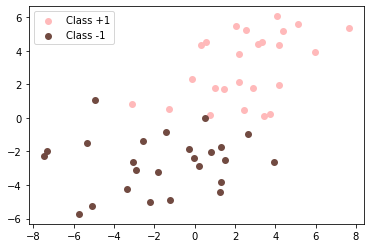

In [6]:
plt.scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

Now we calculate the SVM classifier for 3 different values of $C$:


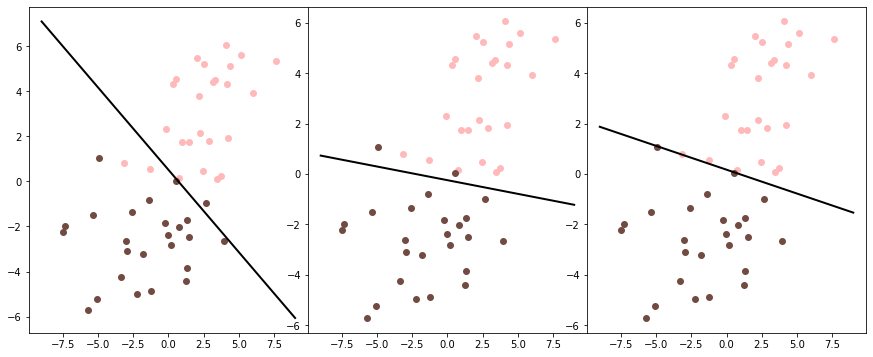

In [7]:
# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
C_i=[0.00001,1,100000]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i))
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    
    axs[i].scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
    axs[i].scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)
    
    
plt.show() 

In [8]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

		     C_1 C_2 C_3
Accuracy training   [ 94.  96. 100.]
Accuracy testing    [ 80. 100. 100.]
Accuracy validation [88. 88. 88.]


For reporting the final accuracy in this dataset, we need to:

1-Train the SVM for all datasets k (in our case k=1) and all the Cs.

2-Choose $C^*$ as the one giving the maximum accuracy in the testing set.

3-Report the accuracy in the validation set.


In [9]:
max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]
print("The accuracy in the studied dataset is %.2f" %Final_accuracy)

The accuracy in the studied dataset is 88.00


## Question:

**23-** Repeat the same for n_samples=100. Do the same k-fold cross-validation for $k=1$ and provide the final accuracy. 

**24-** What happens with the first classifier? 

**25-** Change the range of parameters values for $C$ and repeat 1. For example: $C_i[0]=0.001$.


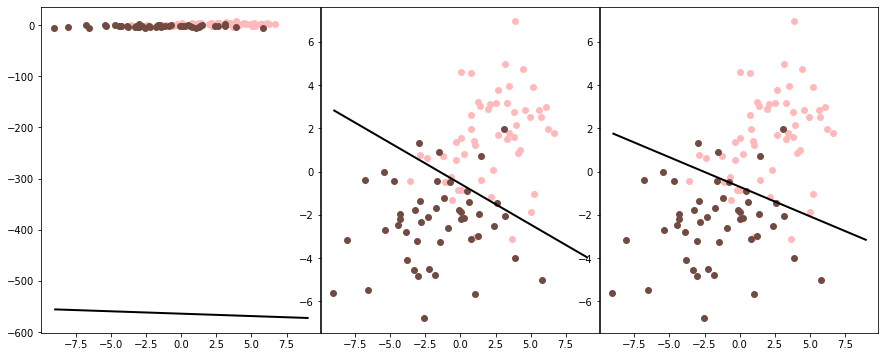

		     C_1 C_2 C_3
Accuracy training   [53. 88. 88.]
Accuracy testing    [46. 82. 82.]
Accuracy validation [48. 80. 80.]
The accuracy in the studied dataset is 80.00


In [10]:
#
#
#23- Repeat the same for n_samples=100. Do the same k-fold cross-validation for  𝑘=1  and provide the final accuracy.
#Answer:
#
n_size=100
X_syn, y_syn = generate_synthetic_data(n_size)
#
# 
#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]
# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
C_i=[0.00001,1,100000]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range): 
    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i)) 
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    
    axs[i].scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
    axs[i].scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)   
plt.show() 
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]
print("The accuracy in the studied dataset is %.2f" %Final_accuracy)

In [11]:
#
#24- What happens with the first classifier?
#
#Answer:
#
#1. In SVM, C is a regularization parameter that controls the trade off between the achieving a low training 
#error and a low testing error that is the ability to generalize your classifier to unseen data.
#
#2. Smaller C leads to more margin violations but wider margin. 
#
#3. When we increase the number of data points in the dataset, we created more outliers.
#
#4. Having a low C gives you a pretty large minimum margin. So, I guess the SVM built a really big margin considering outliers.
#And it is more prone to miscalssification. It failed to classify correctly most of the data points.

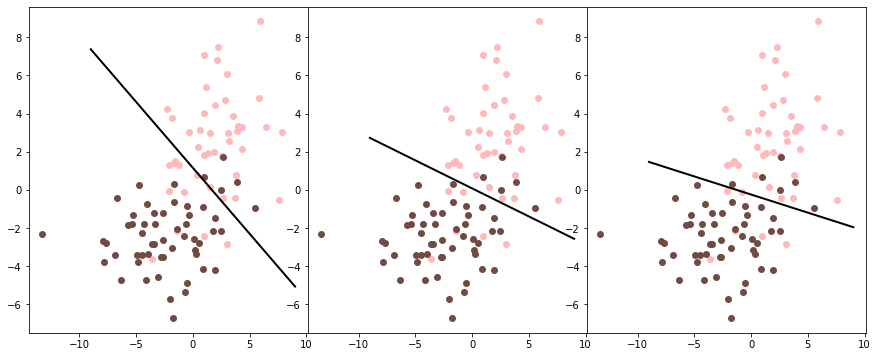

		     C_1 C_2 C_3
Accuracy training   [84. 89. 88.]
Accuracy testing    [84. 92. 90.]
Accuracy validation [88. 92. 90.]
The accuracy in the studied dataset is 92.00


In [12]:
#
#25- Change the range of parameters values for  𝐶  and repeat 1. For example:  𝐶𝑖[0]=0.001 .
#
#Answer:
#
n_size=100
X_syn, y_syn = generate_synthetic_data(n_size)
#
# 
#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]
# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
C_i=[0.001,0.1,10]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range): 
    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i)) 
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    
    axs[i].scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
    axs[i].scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)   
plt.show() 
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]
print("The accuracy in the studied dataset is %.2f" %Final_accuracy)

If we repeat again the same calculations shuffling the data, we will do a 2-fold cross-validation.

Then, for the reporting of results, we will provide the mean (and median and variance) of accuracies among the folds (instances).

In [45]:
#Instance 1:

n_size=100
X_syn, y_syn = generate_synthetic_data(n_size) 

#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]
#print(len(X_syn_training),len(X_syn_testing),len(X_syn_validation))
C_i=[0.001,1,100000]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i))
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)


print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]


#Instance 2:
#We shuffle the data, we do NOT generate new data:
perm = list(range(0,n_size*2))
print(len(perm))
print(len(X_syn))
shuffle(perm)
X_syn = X_syn[perm]
y_syn = y_syn[perm]

#Generate training, testing and validation:
n=np.shape(X_syn)[0]
print("np.shape(X_syn) = ",np.shape(X_syn))
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]


		     C_1 C_2 C_3
Accuracy training   [91. 91. 91.]
Accuracy testing    [78. 76. 76.]
Accuracy validation [86. 84. 84.]
200
200
np.shape(X_syn) =  (200, 2)


In [46]:
#And we solve the correspondins SVMS

# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin

Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)
  
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)
    
    


In [47]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)

i_loc=i_loc[0][0]

Final_accuracy2=Accuracy_validation[i_loc]
print("The accuracy in the first instance is %.2f" %Final_accuracy)
print("The accuracy in the second instance is %.2f" %Final_accuracy2)
sol_acc=(Final_accuracy+Final_accuracy2)/2
print("The accuracy in the studied dataset is %.2f" %sol_acc)

		     C_1 C_2 C_3
Accuracy training   [81. 81. 81.]
Accuracy testing    [82. 82. 82.]
Accuracy validation [92. 94. 94.]
The accuracy in the first instance is 86.00
The accuracy in the second instance is 92.00
The accuracy in the studied dataset is 89.00


## Questions:

**26-** Repeat the same k-fold cross-validation but changing the size of the training, testing and validation dataset.

Now we have:<br />
training 50%<br />
testing 25%<br />
validation 25%<br />

Change it as the following:<br />

training 40%<br />
testing 30%<br />
validation 30%<br />


**27-** Do you obtain a better solution?



In [48]:
#26.1- Repeat the same k-fold cross-validation but changing the size of the training, testing and validation dataset.

#Now we have:
#training 50%
#testing 25%
#validation 25%
#Instance 1:

n_size=100
X_syn, y_syn = generate_synthetic_data(n_size) 

#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]

print("len(X_syn) = ",len(X_syn))
print("len(X_syn_training) = ",len(X_syn_training))
print("len(X_syn_testing) = ",len(X_syn_testing))
print("len(X_syn_validation) = ",len(X_syn_validation))
C_i=[0.001,1,100000]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i))
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)


print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]


#Instance 2:
#We shuffle the data, we do NOT generate new data:
perm = list(range(0,n_size*2))
shuffle(perm)
X_syn = X_syn[perm]
y_syn = y_syn[perm]

#Generate training, testing and validation:
n=np.shape(X_syn)[0]
print("np.shape(X_syn) = ",np.shape(X_syn))
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]

#And we solve the correspondins SVMS

# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin

Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)
  
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)

print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)

i_loc=i_loc[0][0]

Final_accuracy2=Accuracy_validation[i_loc]
print("The accuracy in the first instance is %.2f" %Final_accuracy)
print("The accuracy in the second instance is %.2f" %Final_accuracy2)
sol_acc=(Final_accuracy+Final_accuracy2)/2
print("The accuracy in the studied dataset is %.2f" %sol_acc)
    

len(X_syn) =  200
len(X_syn_training) =  100
len(X_syn_testing) =  50
len(X_syn_validation) =  50
		     C_1 C_2 C_3
Accuracy training   [78. 83. 80.]
Accuracy testing    [86. 90. 90.]
Accuracy validation [94. 88. 88.]
np.shape(X_syn) =  (200, 2)
		     C_1 C_2 C_3
Accuracy training   [74. 84. 83.]
Accuracy testing    [76. 90. 90.]
Accuracy validation [86. 96. 94.]
The accuracy in the first instance is 88.00
The accuracy in the second instance is 96.00
The accuracy in the studied dataset is 92.00



## **The code for question-25 is above. The answer for question-25:**
Dividing the dataset to<br />
training 50%,<br />
testing 25% and<br />
validation 25% <br />
is same with the teacher's sample code. The C and k (in k-fold) parameters are fixed. The result is changed. It was %89 in teacher's example and it is %92 in my answer. The reason for this is that we are shuffling the dataset everytime when we do each fold. Shuffling means randomly assingning data-points to the trainig/testing/validation datasets. So, it is very normal to obtain different (but close) results. Because everytime we shuffle, we change the testing set randomly. <br />
We have close results because the percantage of the datasets are same in teacher's code and my answer.

In [50]:
#26.2-Change it as the following:

#training 40%
#testing 30%
#validation 30%

n_size=100
X_syn, y_syn = generate_synthetic_data(n_size) 
#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.4*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]

print("len(X_syn) = ",len(X_syn))
print("len(X_syn_training) = ",len(X_syn_training))
print("len(X_syn_testing) = ",len(X_syn_testing))
print("len(X_syn_validation) = ",len(X_syn_validation))
C_i=[0.001,1,100000]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i))
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)


print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]


#Instance 2:
#We shuffle the data, we do NOT generate new data:
perm = list(range(0,n_size*2))
shuffle(perm)
X_syn = X_syn[perm]
y_syn = y_syn[perm]

#Generate training, testing and validation:
n=np.shape(X_syn)[0]
print("np.shape(X_syn) = ",np.shape(X_syn))
n_train=int(0.2*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]

#And we solve the correspondins SVMS

# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin

Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)
  
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)

print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)

i_loc=i_loc[0][0]

Final_accuracy2=Accuracy_validation[i_loc]
print("The accuracy in the first instance is %.2f" %Final_accuracy)
print("The accuracy in the second instance is %.2f" %Final_accuracy2)
sol_acc=(Final_accuracy+Final_accuracy2)/2
print("The accuracy in the studied dataset is %.2f" %sol_acc)

len(X_syn) =  200
len(X_syn_training) =  80
len(X_syn_testing) =  60
len(X_syn_validation) =  60
		     C_1 C_2 C_3
Accuracy training   [80. 85. 85.]
Accuracy testing    [86.66666667 88.33333333 88.33333333]
Accuracy validation [80.         86.66666667 88.33333333]
np.shape(X_syn) =  (200, 2)
		     C_1 C_2 C_3
Accuracy training   [62.5 90.  90. ]
Accuracy testing    [42.5 82.5 82.5]
Accuracy validation [52.5  88.75 88.75]
The accuracy in the first instance is 86.67
The accuracy in the second instance is 88.75
The accuracy in the studied dataset is 87.71


## **The code for question-26 is above. The answer for question-26:**
Dividing the dataset to<br />
training 40%,<br />
testing 30% and<br />
validation 30% <br />
decreased the accuracy to %82.08. (In the question-25 it was %92). The reason for this decreasing could be decreasing the size of training data. When we reduce the traning dataset size, the SVM model could not learn enough and had a bad performance. Also, reducing the training size means we could not provide enough diverse data points to the model, and again the model could not learn enough from the dataset. For example, there could be some data points in the testing set that are under-represented in the trainig data.<br />
(Recall= the C and k in k-fold was fixed)